In [7]:
a = 1

In [20]:
import sys
sys.path.insert(0, 'scrape_clean')
from setup import *

In [21]:
import numpy as np # linear algebra
import pandas as pd # Data ETL, csv file I/O
import matplotlib.pyplot as plt # MATLAB like plotting framework
import seaborn as sns # statistical data vizualization library based on matplotlib

color = sns.color_palette()

%matplotlib inline

In [22]:
small_df = pd.read_csv('../data/activities_small.csv', encoding='utf-8')

In [23]:
df = small_df[small_df['commute'] == 0] # drop all where commute = true and store as new dataframe, df
df = df[df['state'] == 'Colorado'] # drop all where state != Colorado
df = df[df['type'] == 'Ride'] # drop everything that is not of type 'Ride' for now
df.dropna(subset=['map_summary_polyline'], inplace=True) # drop all where map_summary_polyline is nan

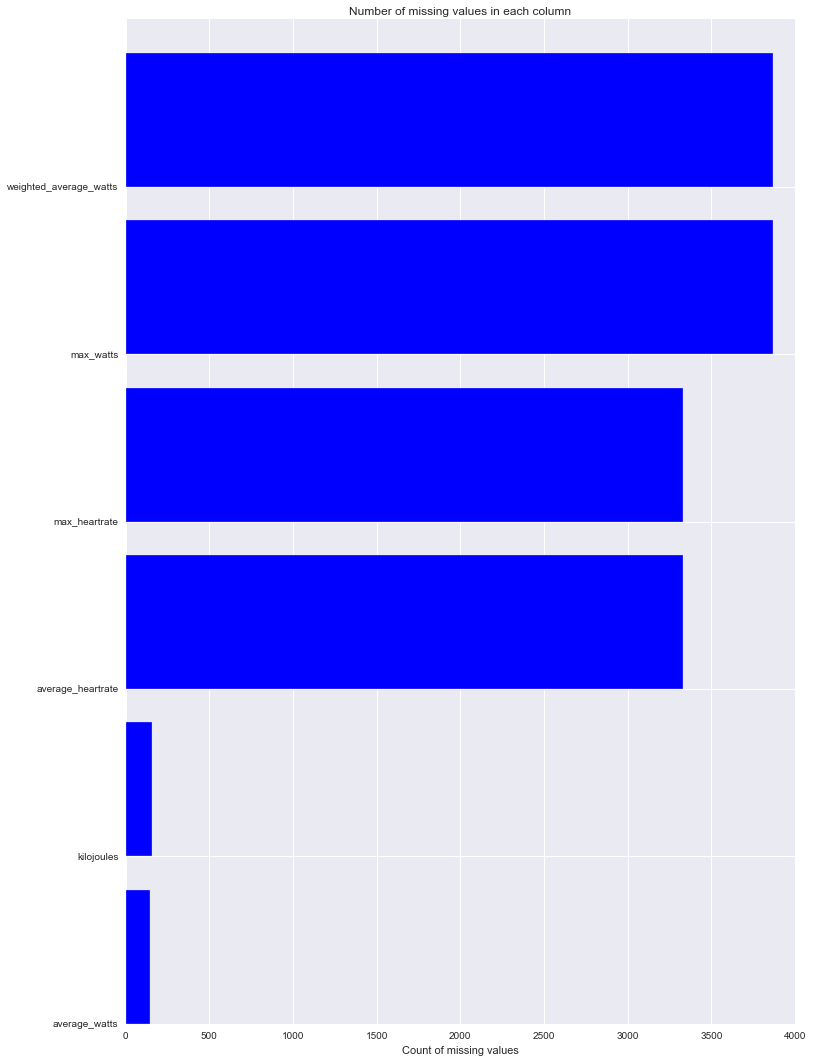

In [24]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [30]:
zero_dist_mask = df['distance'] > 0
df = df[zero_dist_mask]
zero_eg_mask = df['total_elevation_gain'] > 0
df = df[zero_eg_mask]

In [31]:
df = df[df['commute'] == 0] # drop all where commute = true and store as new dataframe, df
co_df = df[df['state'] == 'Colorado'] # drop all where state != Colorado
co_rides_df = co_df[co_df['type'] == 'Ride'] # drop everything that is not of type 'Ride' for now
co_runs_df = co_df[co_df['type'] == 'Run'] # drop everything that is not of type 'Run' for now

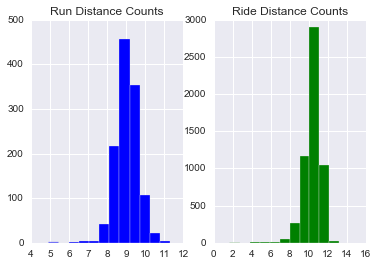

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2)
l_runs_d = co_runs_df.distance.apply(lambda x: np.log(x), 1)
l_rides_d = co_rides_df.distance.apply(lambda x: np.log(x), 1)
ax1.hist(l_runs_d, color='blue', bins=12)
ax1.set_title('Run Distance Counts')
ax2.hist(l_rides_d, color='green', bins=12)
ax2.set_title('Ride Distance Counts')
plt.show()

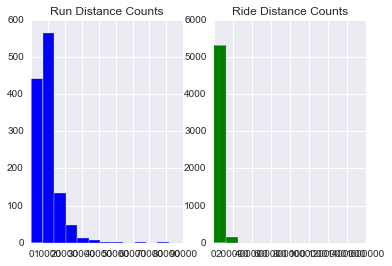

In [33]:
f, (ax1, ax2) = plt.subplots(1, 2)
runs_d = co_runs_df.distance
rides_d = co_rides_df.distance
ax1.hist(runs_d, color='blue', bins=12)
ax1.set_title('Run Distance Counts')
ax2.hist(rides_d, color='green', bins=12)
ax2.set_title('Ride Distance Counts')
plt.show()

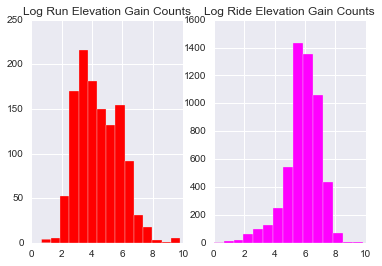

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2)
l_runs_eg = co_runs_df.total_elevation_gain.apply(lambda x: np.log(x), 1)
l_rides_eg = co_rides_df.total_elevation_gain.apply(lambda x: np.log(x), 1)
ax1.hist(l_runs_eg, color='red', bins=15)
ax1.set_title('Log Run Elevation Gain Counts')
ax2.hist(l_rides_eg, color='magenta', bins=15)
ax2.set_title('Log Ride Elevation Gain Counts')
plt.show()

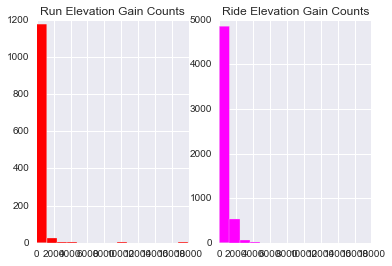

In [35]:
f, (ax1, ax2) = plt.subplots(1, 2)
runs_eg = co_runs_df.total_elevation_gain
rides_eg = co_rides_df.total_elevation_gain
ax1.hist(runs_eg, color='red', bins=15)
ax1.set_title('Run Elevation Gain Counts')
ax2.hist(rides_eg, color='magenta', bins=15)
ax2.set_title('Ride Elevation Gain Counts')
plt.show()

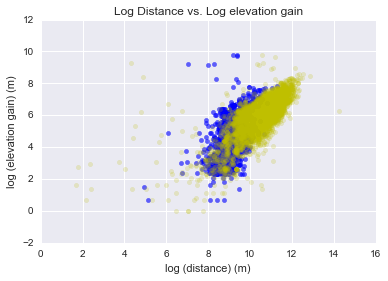

In [36]:
x_runs = l_runs_d.values
x_rides = l_rides_d.values
y_runs = l_runs_eg.values
y_rides = l_rides_eg.values
plt.scatter(x_runs, y_runs, color='b', alpha=.6)
plt.scatter(x_rides, y_rides, color='y', alpha=.2)
plt.xlabel('log (distance) (m)')
plt.ylabel('log (elevation gain) (m)')
plt.title('Log Distance vs. Log elevation gain')
plt.show()

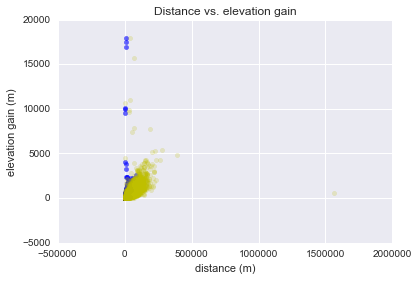

In [37]:
x_runs = runs_d.values
x_rides = rides_d.values
y_runs = runs_eg.values
y_rides = rides_eg.values
plt.scatter(x_runs, y_runs, color='b', alpha=.6)
plt.scatter(x_rides, y_rides, color='y', alpha=.2)
plt.xlabel('distance (m)')
plt.ylabel('elevation gain (m)')
plt.title('Distance vs. elevation gain')
plt.show()

In [39]:
import plotly.plotly as py
from plotly.graph_objs import *
mapbox_access_token = "pk.eyJ1IjoiZ21hY3Bsb3QiLCJhIjoiY2owMTR5bGNkMDV1azMycDN4ZHJheDh5eCJ9.0rRhhDBso2naPuzYxrhEUg"

In [40]:
data = Data([Scattermapbox(
        lon = co_rides_df['start_lng'],
        lat = co_rides_df['start_lat'],
        mode='markers',
        marker=Marker(
            size = 4,
            reversescale = True,
            color='rgba(102, 102, 102)',
            opacity=0.5
            ),
        hoverinfo='text'
    )
    ])

layout = dict(
        title = 'Activity distribution in Colorado',
        autosize=True,
        hovermode='closest',
        mapbox=dict(
            accesstoken=mapbox_access_token,
            bearing=0,
            center=dict(
                lat=39.5501,
                lon=-105.7821
                ),
            pitch=0,
            zoom=5,
            style="mapbox://styles/gmacplot/cj015aa2r00982ssju4hyfu1l",
            ),
        )


fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-activities' )